In [1]:
import requests as req
from bs4 import BeautifulSoup
from PIL import Image
import io
import matplotlib.pyplot as plt
import cv2
import PIL

In [2]:
url = 'https://rosreestr.ru/wps/portal/online_request'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2224.3 Safari/537.36'}
page = req.get(url, headers = headers)
page.content
# soup = BeautifulSoup(page.text,'html.parser')
# cad_num = soup.find("input", attrs={ "name" : "cad_num"})
# val = cad_num.get('value')

b'<!DOCTYPE html>\n<html lang="ru" xml:lang="ru">\n<head>\n\t<!--<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1"/>-->\n\t<meta name="google-site-verification" content="rVxCzUlW0G3ecSPGtVqlLM5AtY-yfSoX5n8DCA4pdcE"/>\n\t<link rel="stylesheet" href="/wps/contenthandler/!ut/p/digest!i7j42wVIH2kObPvgdhUqKA/sp/mashup:ra:collection?themeID=ZJ_GQ4E1C41KOMJ20AIOTDK0F3085&amp;locale=en&amp;mime-type=text%2Fcss&amp;entry=wp_one_ui_30__0.0%3Ahead_css&amp;entry=wp_one_ui_dijit_30__0.0%3Ahead_css&amp;entry=wp_status_bar__0.0%3Ahead_css&amp;entry=wp_portlet_css__0.0%3Ahead_css&amp;entry=wp_theme_portal_80__0.0%3Ahead_css&amp;entry=wp_legacy_layouts__0.0%3Ahead_css&amp;entry=wp_project_menu__0.0%3Ahead_css&amp;entry=wp_ic4_wai_resources__0.0%3Ahead_css&amp;entry=wp_preview__0.0%3Ahead_css&amp;entry=wp_oob_sample_styles__0.0%3Ahead_css" type="text/css"/><link rel="alternate" id="head_css_deferred" href="/wps/contenthandler/!ut/p/digest!D60zoVlAaCtfI

In [2]:
def make_rosreestr_img_white(img):
    w,h,c = img.shape
    for i in range(4,35):
        for j in range(27,128):
            for k in range(c):
                elem = img[i][j][k]
                if (elem < 255) & (elem >= 90):
                    img[i][j][k] = 255
                if (elem < 90) & (elem > 0):
                    img[i][j][k] = 0

    for i in range(0,50):
        for j in range(0,27):
            for k in range(c):
                img[i][j][k] = 255
        for j in range(129,180):
            for k in range(c):
                img[i][j][k] = 255

    for i in range(0,3):
        for j in range(27,129):
            for k in range(c):
                img[i][j][k] = 255

    for i in range(36,50):
        for j in range(27,129):
            for k in range(c):
                img[i][j][k] = 255
    return img

In [3]:
def cv2_preprocess(img):
    image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,image_gray = cv2.threshold(image_gray,10,255,cv2.THRESH_BINARY)
    image_gray = cv2.GaussianBlur(image_gray, ksize=(3,3), sigmaX = 0)
    image_gray = cv2.medianBlur(image_gray, 3)
    gray_smooth_img = PIL.Image.fromarray(image_gray.astype('uint8'))
    return gray_smooth_img

In [4]:
number = ['1','2','3','4','5','6','7','8','9']
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
ALPHABET = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

MAX_CAPTCHA = 5

WIDTH=160
HEIGHT=60


def get_char_set():
	return number#+alphabet

def get_char_set_len():
	return len(get_char_set())

def get_captcha_size():
	return MAX_CAPTCHA

def get_y_len():
	return MAX_CAPTCHA*get_char_set_len()

def get_width():
    return WIDTH

def get_height():
    return HEIGHT

In [5]:
import os.path
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import model_from_json


MAX_CAPTCHA = get_captcha_size()
CHAR_SET_LEN = get_char_set_len()

# number of convolutional filters to use
nb_filters1 = 32
nb_filters2 = 64
nb_filters3 = 64
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

WEIGHT_FILE = "my_model_weights.h5"

def get_model(input_shape):
    model = Sequential()
    if os.path.exists(WEIGHT_FILE):
        print ("loading the trained model")
        model = model_from_json(open('my_model.json').read())  
        model.load_weights(WEIGHT_FILE)
    return model


def get_weights_file():
    return WEIGHT_FILE

Using TensorFlow backend.


In [6]:
# LOAD_DATA
# Author:kemo

import os
from PIL import Image
import numpy as np
import random

np.random.seed(1337)

# load_data.py and captcha_recognition.py we need to define the MAX_CAPTCHA,the CHAR_SET_LEN ,the tol_num,the train_num and the parameters of the model

# the length of the captcha text
MAX_CAPTCHA = get_captcha_size()
# the number of elements in the char set 
CHAR_SET_LEN = get_char_set_len()

CHAR_SET = get_char_set()

Y_LEN = get_y_len()

height = get_height()
width = get_width()

# return the index of the max_num in the array
def get_max(array):
    max_num = max(array)
    for i in range(len(array)):
        if array[i] == max_num:
            return i

def get_text(array):
    text = []
    max_num = max(array)
    for i in range(len(array)):
        text.append(CHAR_SET[array[i]])
    return text

# text to vector.For example, if the char set is 1 to 10,and the MAX_CAPTCHA is 1
# text2vec(1) will return [0,1,0,0,0,0,0,0,0,0]
def text2vec(text):
    text_len = len(text)
    if text_len > MAX_CAPTCHA:
        raise ValueError(MAX_CAPTCHA)
        # the shape of the vector is 1*(MAX_CAPTCHA*CHAR_SET_LEN)
    vector = np.zeros(MAX_CAPTCHA*CHAR_SET_LEN)
    def char2pos(c):
        k = CHAR_SET.index(c)
        return k
    for i, c in enumerate(text):
        idx = i * CHAR_SET_LEN + char2pos(c)
        vector[idx] = 1
    return vector


# text to vector.For example, if the char set is 1 to 10,and the MAX_CAPTCHA is 1
# text2vec(1) will return [0,1,0,0,0,0,0,0,0,0]
def text2vec2(text):
    text_len = len(text)
    if text_len > MAX_CAPTCHA:
        raise ValueError('max4')
        # the shape of the vector is 1*(MAX_CAPTCHA*CHAR_SET_LEN)
    vector = np.zeros(MAX_CAPTCHA)
    def char2pos(c):
        k = 30
        return k
    for i, c in enumerate(text):
        idx = i
        vector[idx] = char2pos(c)
    return vector

def load_data(tol_num,train_num):
      
    # input,tol_num: the numbers of all samples(train and test)
    # input,train_num: the numbers of training samples
    # output,(X_train,y_train):trainging data
    # ouput,(X_test,y_test):test data
 
    data = np.empty((tol_num, 1, height, width),dtype="float32")
    label = np.empty((tol_num,Y_LEN),dtype="uint8")

    # data dir
    imgs = os.listdir("captcha_razmetka_prep_bmp")
    
    for i in range(tol_num):
        # load the images and convert them into gray images
        img = get_image_from_file("captcha_razmetka_prep_bmp/"+imgs[i])

        arr = np.asarray(img,dtype="float32")
        try:
            data[i,:,:,:] = arr
            captcha_text = imgs[i].split('.')[0].split('_')[1]
            label[i]= text2vec(captcha_text)
        except:
            pass

    # the data, shuffled and split between train and test sets
    rr = [i for i in range(tol_num)] 
    random.shuffle(rr)
    X_train = data[rr][:train_num]
    y_train = label[rr][:train_num]
    X_test = data[rr][train_num:]
    y_test = label[rr][train_num:]
    
    return (X_train,y_train),(X_test,y_test)

def get_image_from_file(path_img):
    img = Image.open(path_img)
    return pre_process_image(img)

def load_image(img):
    tol_num = 1
    data = np.empty((tol_num, 1, height, width),dtype="float32")

    img = pre_process_image(img)

    arr = np.asarray(img,dtype="float32")
    data[0,:,:,:] = arr
    return data


def pre_process_image(img):
    img = img.convert('L')
    # Resize it.
    img = img.resize((width, height), Image.BILINEAR)

    return img


def get_x_input_from_file(img):
    with open(fileName, mode='rb') as file: # b is important -> binary
        fileContent = file.read()

    stream = io.BytesIO(r_data)

    img = Image.open(stream)

    X_test = get_x_input_from_image(img)

    return X_test

def get_x_input_from_image(img):
    X_test = load_image(img)

    X_test = X_test.reshape(X_test.shape[0], height, width, 1)

    X_test = X_test.astype('float32')
    X_test /= 255

    return X_test

In [7]:
class CaptchaEval:

	def __init__(self):
		# load the trained model
		self.model = get_model('')

		self.model.compile(loss='categorical_crossentropy',
		              optimizer='adadelta',
		              metrics=['accuracy'])

   
	def predict_from_img(self, img):
		X_test = get_x_input_from_image(img)


		predict = self.model.predict(X_test)


		text = ''
		for i in range(X_test.shape[0]):
		    true = []
		    predict2 = []
		    for j in range(get_captcha_size()):
		        char_index = get_max(predict[i,get_char_set_len()*j:(j+1)*get_char_set_len()])
		        char = get_char_set()[char_index]
		        predict2.append(char)
		    text = text.join(predict2)

		return text

loading the trained model
97674
https://rosreestr.ru/wps/portal/p/cc_ib_portal_services/online_request/!ut/p/z1/pVBNc4IwEP01PWcDiNVbio7t2Gr9ag0XJsQM4EBgYtJp_30TwLEX9dBMLm_37XtvF8Voj2LJvoqM6aKWrLSYxmEyWwVTHAV4PlvhIZAXMsc-ngFsB-jzJmGJUfyfeUtw83DlEbDz8U2LyLtDcBHvmVAbcpgAfiaYBN58OdmOgKx9-HhdeB4ARhunwWupVV2WQiH6ABvBFM8Jd4d03VOLE_3TCEQjMkkWu7en6dq1UlOUh0Jm1sfJsEMiTYVoGI4DPAYfMMBgjEPXVCJzevSPIussqFZGtGWTHgXXHSevzUn0dM2UTpr6VHT8wairKiH02bnRPGdb8a3PDlqXohKyx3V67KI5ICQ3VaqY5CKxsXpG2YZP3Q0u8v3WFkC7RJHl-jJjy4Zro_qcrLE5e8-m2u2heK-qR__q_wVuA9pu/p0/IZ7_01HA1A42KODT90AR30VLN22001=CZ6_GQ4E1C41KGQ170AIAK131G00T5=MEcontroller!QCPSearchAction==/


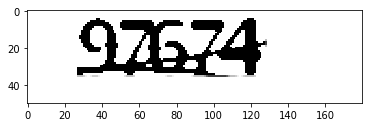

In [24]:
with req.session() as sess:        
    link = 'https://rosreestr.ru/wps/portal/online_request'
    form_request = 'https://rosreestr.ru/wps/portal/p/cc_ib_portal_services/online_request/!ut/p/z1/pVBNc4IwEP01PWcDiNVbio7t2Gr9ag0XJsQM4EBgYtJp_30TwLEX9dBMLm_37XtvF8Voj2LJvoqM6aKWrLSYxmEyWwVTHAV4PlvhIZAXMsc-ngFsB-jzJmGJUfyfeUtw83DlEbDz8U2LyLtDcBHvmVAbcpgAfiaYBN58OdmOgKx9-HhdeB4ARhunwWupVV2WQiH6ABvBFM8Jd4d03VOLE_3TCEQjMkkWu7en6dq1UlOUh0Jm1sfJsEMiTYVoGI4DPAYfMMBgjEPXVCJzevSPIussqFZGtGWTHgXXHSevzUn0dM2UTpr6VHT8wairKiH02bnRPGdb8a3PDlqXohKyx3V67KI5ICQ3VaqY5CKxsXpG2YZP3Q0u8v3WFkC7RJHl-jJjy4Zro_qcrLE5e8-m2u2heK-qR__q_wVuA9pu/'
    captcha_link = 'https://rosreestr.ru/wps/portal/p/cc_ib_portal_services/online_request/!ut/p/z1/04_Sj9CPykssy0xPLMnMz0vMAfIjo8zi3QNNXA2dTQy93QMNzQ0cPR29DY0N3Q0MQkz1w_Eq8DfUj6JEP1ABSL8BDuBoANQfhdcKZyMCCkBOJGRJQW5ohEGmpyIAKLXudw!!/'
    
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2224.3 Safari/537.36'}
    page = req.get(link, headers = headers)
    soup = BeautifulSoup(page.text,'html.parser')

    searchForm = soup.find("form", attrs={ "name" : "ns_Z7_01HA1A42KODT90AR30VLN22001_searchForm"})['action']
    form_action = form_request + searchForm
    
    captchaForm = soup.find("img", attrs={ "id" : "captchaImage2"})['src']
    captcha_link = captcha_link + captchaForm
    
    page_byte_req = req.get(captcha_link)
    captcha_byte = io.BytesIO(page_byte_req.content)
    image_for_pred = Image.open(captcha_byte)
    image_for_pred.save('./request_captcha_buf/captcha_request.bmp')
    img = cv2.imread('./request_captcha_buf/captcha_request.bmp')
    image_prep = cv2_preprocess(img)
    image_prep.save('./request_captcha_buf/captcha_request_white.bmp')
    gray_smooth = cv2.imread('./request_captcha_buf/captcha_request_white.bmp')
    white_img = make_rosreestr_img_white(gray_smooth)
    temp_img = PIL.Image.fromarray(white_img.astype('uint8'))
    plt.imshow(temp_img)

    captchaEval = CaptchaEval()
    text = captchaEval.predict_from_img(temp_img)
    print(text)
    
    form = {'search_action': 'true',
            'search_type' : 'CAD_NUMBER',
            'cad_num': '66:41:0301005:16',
            'start_position': 59,
            'captchaText': text}
    r = sess.post(form_action, data=form)
    print(r.url)
    'https://rosreestr.ru/wps/portal/p/cc_ib_portal_services/online_request/!ut/ \
    p/z1/04_Sj9CPykssy0xPLMnMz0vMAfIjo8zi3QNNXA2dTQy93QMNzQ0cPR29DY0N3Q0MQkz1w_ \
    Eq8DfUj6JEP1ABSL8BDuBoANQfhdcKZyMCCkBOJGRJQW5ohEGmpyIAKLXudw!!/ \
    p0/IZ7_01HA1A42KODT90AR30VLN22001=CZ6_GQ4E1C41KGQ170AIAK131G00T5=MEcontroller!QCPSearchAction==/'
    
    'https://rosreestr.ru/wps/portal/p/cc_ib_portal_services/online_request/!ut/ \
    p/z1/pVDLbsIwEPyanr1OAhRuLiBa0UJ5tSQXyzFWYpQ4kbGr9u9rJ0H0Ahxq-TK7szOzixK0R4liXzJjRlaKFQ7HSZ_ \
    OVtEUjyM8n63wAMgLmeMQzwC2PfR5k7DEKPnPvCP4ebjyCLj55KbFOLhD8BHvmcQu5IACfiaYRMF8OdkOgaxD- \
    HhdBAEARhuvwStldFUUQqP4ATaCaZ4T7g_pu6cGU_NTCxSPyYQudm9P07VvpVYWB6ky5-Nl2IEqW6K43x9FeAQhYIDeKPQ9LTIvF_ \
    8RZK1DbLQVTdmmR8FNy8krexId3TBtaF2dZMvvDduqFsKcjWvDc7YV3- \
    bsYEwhSqE6XKXHNpkHQnFbppopLqiL1TGKJnvqT3CR75Z2AJolZJaby4wrW26s7nKy2uXsPOtytwf5XpaP4dX_C7dHCUw!/ \
    p0/IZ7_01HA1A42KODT90AR30VLN22001=CZ6_GQ4E1C41KGQ170AIAK131G00T5=MEcontroller!QCPSearchAction==/'
    
    'https://rosreestr.ru/wps/portal/p/cc_ib_portal_services/online_request/!ut/ \
    p/z1/pVBNc4IwEP01PWeDiMVbio7t2Gr9ag0XJsQM4EBgYtJp_30TwLEX9dBMLm_37XtvF8Voj2LJvoqM6aKWrLSYxkEyW_ \
    lTHPl4PlvhEZAXMscDPAPYDtHnTcISo_g_85bg5uHKI2Dn45sWkXeH4CLeM6E25CgB_ \
    Eww8b35crINgawH8PG68DwAjDZOg9dSq7oshUL0ATaCKZ4T7g7puqcWJ_qnEYhGZJIsdm9P07VrpaYoD4XMrI- \
    TYYdEmgrRIBj7eAwYAghHY4xD11Uic4L0jyTrPKhWRrRlkx4F1x0nr81J9HTNlE6a-lR0_GHYVZUQ- \
    mzdaJ6zrfjWZwetS1EJ2eM6PXbZHBCSmypVTHKR2Fg9o2zTp-4IF_l-bQugXaLIcn2ZsWXDtVF9TtbYnL1nU-32ULxX1ePg6v8F4fwBzA!!/ \
    p0/IZ7_01HA1A42KODT90AR30VLN22001=CZ6_GQ4E1C41KGQ170AIAK131G00T5=MEcontroller!QCPSearchAction==/'

https://rosreestr.ru/wps/portal/p/cc_ib_portal_services/online_request/!ut/p/z1/04_Sj9CPykssy0xPLMnMz0vMAfIjo8zi3QNNXA2dTQy93QMNzQ0cPR29DY0N3Q0MQkz1w_Eq8DfUj6JEP1ABSL8BDuBoANQfhdcKZyMCCkBOJGRJQW5ohEGmpyIAKLXudw!!/p0/IZ7_01HA1A42KODT90AR30VLN22001=CZ6_GQ4E1C41KGQ170AIAK131G00T5=MEcontroller!QCPSearchAction==/
loading the trained model
31187
b'<!DOCTYPE html>\n<html lang="ru" xml:lang="ru">\n<head>\n\t<!--<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, minimum-scale=1"/>-->\n\t<meta name="google-site-verification" content="rVxCzUlW0G3ecSPGtVqlLM5AtY-yfSoX5n8DCA4pdcE"/>\n\t<link rel="stylesheet" href="/wps/contenthandler/!ut/p/digest!ZF_6ED38TZ1o1y17paopfA/sp/mashup:ra:collection?themeID=ZJ_GQ4E1C41KOMJ20AIOTDK0F3085&amp;locale=en&amp;mime-type=text%2Fcss&amp;entry=wp_one_ui_30__0.0%3Ahead_css&amp;entry=wp_one_ui_dijit_30__0.0%3Ahead_css&amp;entry=wp_status_bar__0.0%3Ahead_css&amp;entry=wp_portlet_css__0.0%3Ahead_css&amp;entry=wp_theme_portal_80__0.0%3

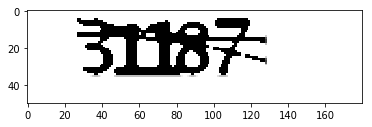

In [40]:
with req.session() as sess:    
    form_link = 'https://rosreestr.ru/wps/portal/online_request'
    page = req.get(form_link)
    soup = BeautifulSoup(page.text,'html.parser')
    soup.find("img", attrs={ "id" : "captchaImage2"})


    captcha_byte_req = req.get(captcha_link)
    captcha_byte = io.BytesIO(captcha_byte_req.content)
    image_for_pred = Image.open(captcha_byte)
    image_for_pred.save('./request_captcha_buf/captcha_request.bmp')

    img = cv2.imread('./request_captcha_buf/captcha_request.bmp')
    image_prep = cv2_preprocess(img)
    image_prep.save('./request_captcha_buf/captcha_request_white.bmp')
    gray_smooth = cv2.imread('./request_captcha_buf/captcha_request_white.bmp')
    white_img = make_rosreestr_img_white(gray_smooth)
    temp_img = PIL.Image.fromarray(white_img.astype('uint8'))
    plt.imshow(temp_img)

    captchaEval = CaptchaEval()
    text = captchaEval.predict_from_img(temp_img)


    form = {'cad_num': '66:41:0106097:119',
            'captcha_text': text}
    print(text)
    r = req.post(form_link, data=form)
    print(r.content)
#     soup = BeautifulSoup(r.text,'html.parser')
#     print(soup.find("td", attrs={ "class" : "td"}))